&nbsp; &nbsp;  &nbsp; teste \
teste


The action of every agent <br />
  into the world <br />
starts <br />
  from their physical selves. <br />


In [ ]:
%pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



# Análise espacial em Python

https://geopy.readthedocs.io/en/stable/

In [ ]:
#Geolocalização
from geopy.geocoders import Nominatim #api que oferece as geolocalizacoes de diferentes cidades
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import time
import math

In [ ]:
# Objeto Nominatim
geo = Nominatim(user_agent = "AppMap")

# Municípios

In [ ]:
#Definimos o lugar
loc = geo.geocode("Sarandi, PR")
print(loc.address,"\n", loc.latitude, loc.longitude)

Sarandi, Região Geográfica Imediata de Maringá, Região Geográfica Intermediária de Maringá, Paraná, Região Sul, Brasil 
 -23.444117 -51.876016


In [ ]:
#Definimos o lugar
loc = geo.geocode("São Paulo, SP")
print(loc.address,"\n", loc.latitude, loc.longitude)

São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Região Sudeste, Brasil 
 -23.5506507 -46.6333824


# Endereço

In [ ]:
#Vejamos outro exemplo
loc = geo.geocode("Av. Getúlio Vargas, 671")
print(loc.address,"\n", loc.latitude, loc.longitude)

671, Avenida Getúlio Vargas, Savassi, Regional Centro-Sul, Belo Horizonte, Região Geográfica Imediata de Belo Horizonte, Região Metropolitana de Belo Horizonte, Região Geográfica Intermediária de Belo Horizonte, Minas Gerais, Região Sudeste, 30130-138, Brasil 
 -19.935039265476057 -43.929646378523856


In [ ]:
#Localização de CWB
loc = geo.geocode("R. Mal. Hermes, 999 - Centro Cívico")
print(loc.address,"\n", loc.latitude, loc.longitude)

999, Rua Marechal Hermes, Centro Cívico, Curitiba, Região Geográfica Imediata de Curitiba, Região Metropolitana de Curitiba, Região Geográfica Intermediária de Curitiba, Paraná, Região Sul, 80504-000, Brasil 
 -25.4098954 -49.2662046


In [ ]:
#Outra forma de obter a localização:
lugar = input("Ingresa un lugar por favor") #exemplo: "Av. Luiz Xavier, 11 - Centro, Curitiba - PR"
loc = geo.geocode(lugar)
print((loc.latitude, loc.longitude))

Ingresa un lugar por favorAv. Luiz Xavier, 11 - Centro, Curitiba - PR
(-25.4323067, -49.2739905)


# Localização de várias cidades

In [ ]:
location_lista = ["São Paulo, SP", "Maringá, PR","Tóquio, Japão"]

#Lista
for i in location_lista:
    address = geo.geocode(i, timeout=10) 
    print ("|Localização "+ i + " : " + str(address.longitude) + "," + str(address.latitude)) 
    time.sleep(1)

|Localização São Paulo, SP : -46.6333824,-23.5506507
|Localização Maringá, PR : -51.9382078,-23.425269
|Localização Tóquio, Japão : 139.7594549,35.6828387


# Calcular a distancia entre os locais

In [ ]:
from geopy.distance import distance
saopaulo = (-46.6333824,-23.550650)
maringa  = (-51.9382078,-23.425269)
distancia = distance(saopaulo,maringa).km
print(distancia)

590.0472559828331


# Import Shapefile

In [ ]:
shape_br = gpd.read_file("/content/BR_UF_2020.shp")

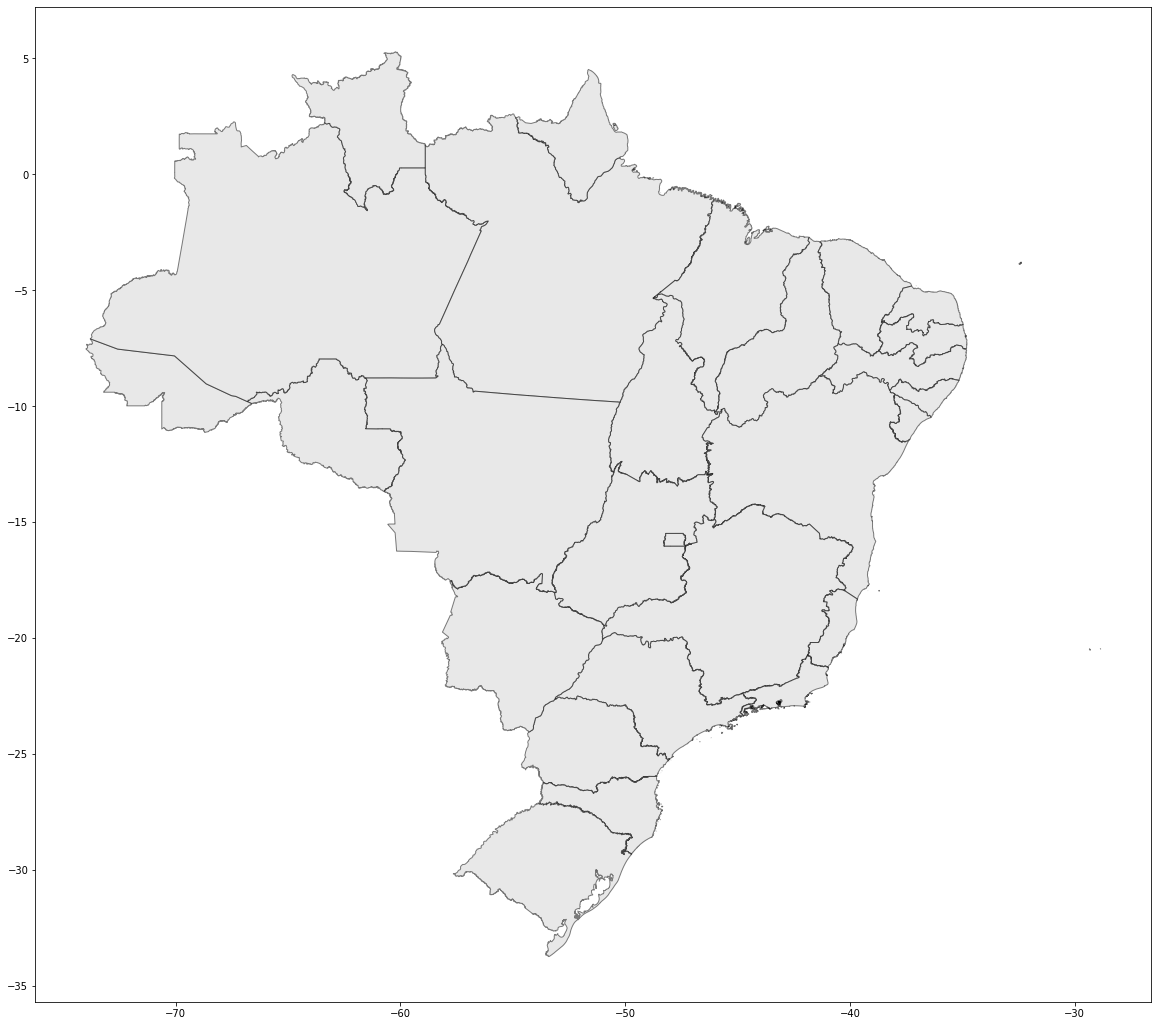

In [ ]:
fig, ax = plt.subplots(figsize = (20, 20))

shape_br.plot(color = "lightgrey",
              edgecolor = "black",
              ax = ax,
              alpha = .5)

In [ ]:
shape_br

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry
0,11,Rondônia,RO,Norte,"POLYGON ((-65.38150 -10.42907, -65.38013 -10.4..."
1,12,Acre,AC,Norte,"POLYGON ((-71.07772 -9.82774, -71.07817 -9.828..."
2,13,Amazonas,AM,Norte,"POLYGON ((-69.83766 -3.68659, -69.82555 -3.620..."
3,14,Roraima,RR,Norte,"POLYGON ((-63.96008 2.47313, -63.96041 2.47416..."
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ..."
5,16,Amapá,AP,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2..."
6,17,Tocantins,TO,Norte,"POLYGON ((-48.23291 -5.94757, -48.23163 -5.946..."
7,21,Maranhão,MA,Nordeste,"MULTIPOLYGON (((-44.96620 -1.27114, -44.96081 ..."
8,22,Piauí,PI,Nordeste,"POLYGON ((-42.91509 -6.64795, -42.91636 -6.644..."
9,23,Ceará,CE,Nordeste,"POLYGON ((-41.18292 -4.01797, -41.18552 -4.017..."


# add pontos no shapefile

In [ ]:
location_lista = ["São Paulo, SP", "Maringá, PR","Curitiba, PR","Florianópolis, SC",
                  "Vitória, ES", "Salvador, BA"]

df_geo = pd.DataFrame(data = location_lista, columns = ["endereco"])
df_geo["longitude"] = ""
df_geo["latitude"]  = ""

#Lista
for idx, i in enumerate(location_lista):
    address= geo.geocode(i, timeout = 10) 
    df_geo.iloc[idx,1] = address.longitude
    df_geo.iloc[idx,2] = address.latitude
    print (idx,"|Localização "+ i + " : " + str(address.longitude) + "," + str(address.latitude)) 
    time.sleep(1)

0 |Localização São Paulo, SP : -46.6333824,-23.5506507
1 |Localização Maringá, PR : -51.9382078,-23.425269
2 |Localização Curitiba, PR : -49.2712724,-25.4295963
3 |Localização Florianópolis, SC : -48.5496098,-27.5973002
4 |Localização Vitória, ES : -40.3376682,-20.3200917
5 |Localização Salvador, BA : -38.4812772,-12.9822499


In [ ]:
df_geo

,endereco,longitude,latitude
0,"São Paulo, SP",-46.633382,-23.550651
1,"Maringá, PR",-51.938208,-23.425269
2,"Curitiba, PR",-49.271272,-25.429596
3,"Florianópolis, SC",-48.54961,-27.5973
4,"Vitória, ES",-40.337668,-20.320092
5,"Salvador, BA",-38.481277,-12.98225


# Sobreposição de infos

(-76.24759047174999, -26.59049941125, -35.70232894755, 7.22299203055)

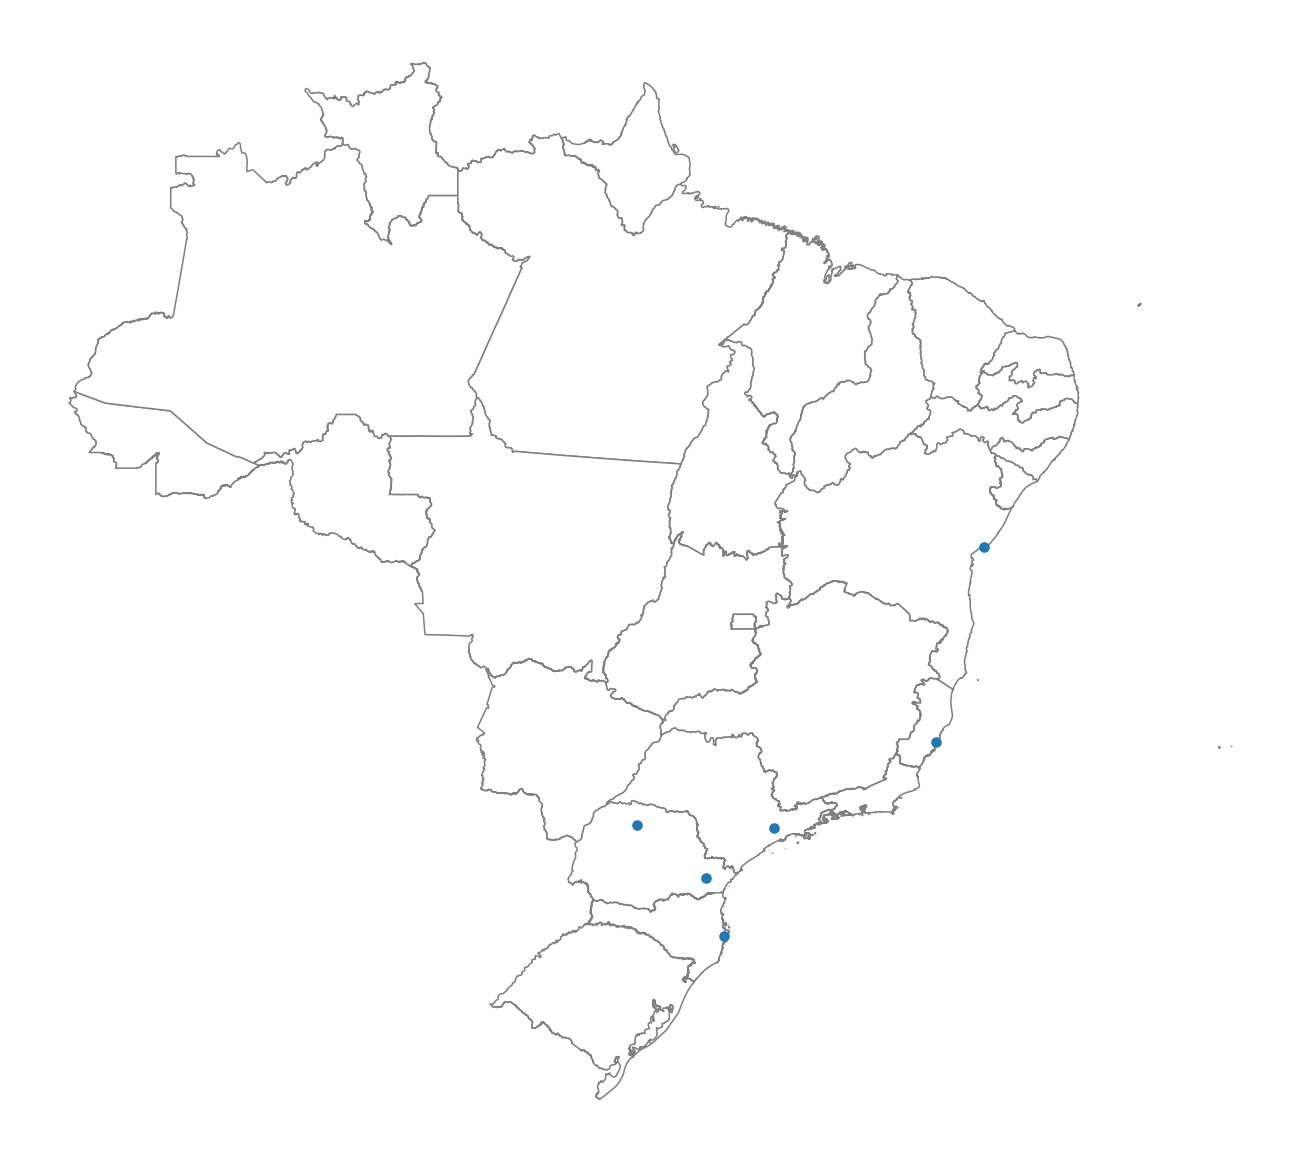

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15), dpi = 110)

shape_br.plot(facecolor = "white", edgecolor = "gray", ax = ax)
plt.scatter(x = df_geo["longitude"], y = df_geo["latitude"],  s = 35)
ax.axis("off")

In [ ]:
df_geo["evento"]    = np.array([250,125,354,547,325,750]) 
df_geo["id_cidade"] = np.array([0,1,2,3,4,5]) 

In [ ]:
df_geo

,endereco,longitude,latitude,evento,id_cidade
0,"São Paulo, SP",-46.633382,-23.550651,250,0
1,"Maringá, PR",-51.938208,-23.425269,125,1
2,"Curitiba, PR",-49.271272,-25.429596,354,2
3,"Florianópolis, SC",-48.54961,-27.5973,547,3
4,"Vitória, ES",-40.337668,-20.320092,325,4
5,"Salvador, BA",-38.481277,-12.98225,750,5


# Cores

(-76.24759047175, -26.590499411249993, -35.70232894755001, 7.222992030550001)

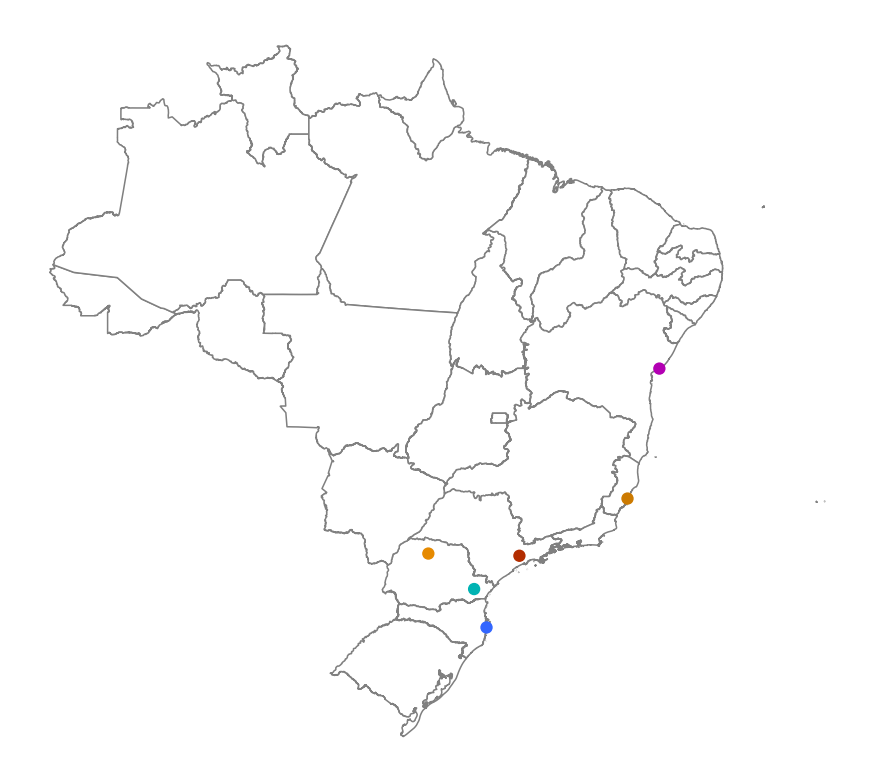

In [ ]:
colors = {0: "#B32D00",
          1: "#E68A00",
          2: "#00B3B3",
          3: "#3366FF",
          4: "#cc7a00",
          5: "#b300b3"}

fig, ax = plt.subplots(figsize=(10, 10), dpi = 110)

shape_br.plot(facecolor = "white", edgecolor = "gray", ax = ax)
plt.scatter(x = df_geo["longitude"],  y = df_geo["latitude"], c = df_geo["id_cidade"].map(colors), s = 50)
ax.axis("off")

# tamanho

(-76.24759047175, -26.590499411249993, -35.70232894755001, 7.222992030550001)

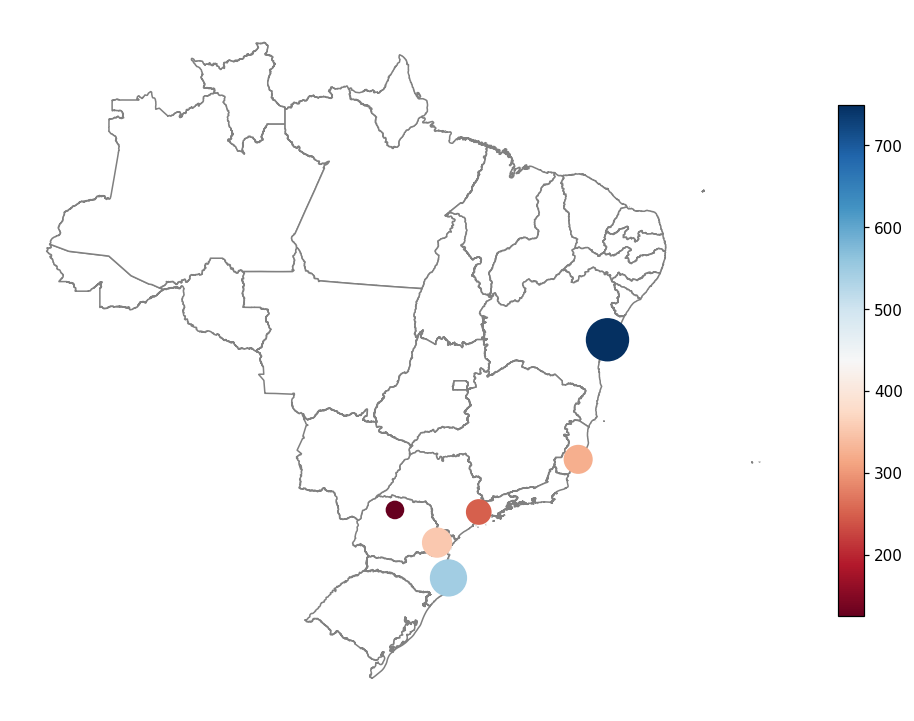

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), dpi = 110)

shape_br.plot(facecolor = "white", edgecolor = "gray", ax = ax)
plot = ax.scatter(x = df_geo["longitude"],  y = df_geo["latitude"], c = df_geo["evento"], cmap = "RdBu",  s = df_geo["evento"])
plt.colorbar(plot, ax = ax, fraction = 0.03)
ax.axis("off")

(-76.24759047175, -26.590499411249993, -35.70232894755001, 7.222992030550001)

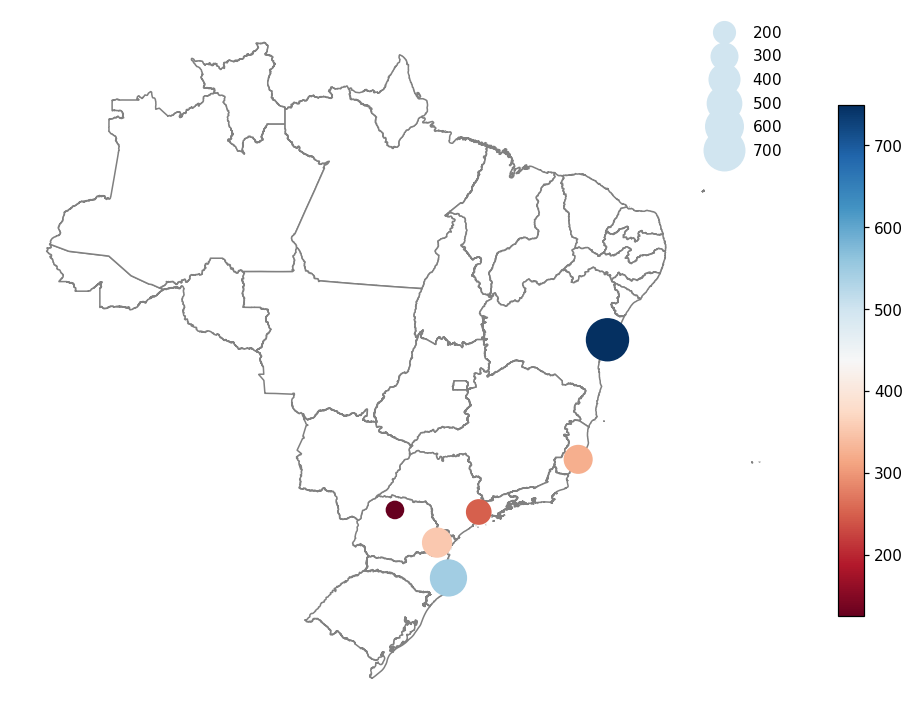

In [ ]:
c_map = plt.cm.get_cmap("RdBu")

kw = dict(prop = "sizes", num = 6, color = c_map(0.6))

fig, ax = plt.subplots(figsize=(10, 10), dpi = 110)

shape_br.plot(facecolor = "white", edgecolor = "gray", ax = ax)
plot = ax.scatter(x = df_geo["longitude"],  y = df_geo["latitude"], c = df_geo["evento"], cmap = "RdBu",  s = df_geo["evento"])
plt.legend(*plot.legend_elements(**kw), frameon = False)
plt.colorbar(plot, ax = ax, fraction = 0.03)
ax.axis("off")